# Advanced lane lines

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

### [function] Resize Images

In [2]:
def resizeImage(image,shape=(1280,720)):
    """
    image should be a np.array image, note that it will be modified
    """
    ysize = image.shape[0]
    xsize = image.shape[1]

    # Resize image if necesaary
    if xsize != shape[0] and ysize != shape[1]:
        image = cv2.resize(image, (shape[0], shape[1]),)

    return image

### [function] Display a list of images

In [3]:
def displayListImages(images,titles=[],cols=1,cmap=None, figSize = [12,12], overplot = None):
    """
    Function to display and resize a list of images
    images is a list of matplotlib image (use imread)
    titles is a list of strings
    cols is an integer with the number of columns to display
    rows is an integer with the number of rows to display
    """
    rows = len(images)//cols
    if len(cal_images)%cols > 0:
        rows+=1

    # Helper to adapt images to full width
    plt.rcParams['figure.figsize'] = [figSize[0], figSize[1]*cols]
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

    for i in range(len(images)):
        
        plt.subplot(rows, cols, i+1)
        
        image = resizeImage(images[i])
        if titles:
            plt.title(titles[i]) 
        plt.imshow(image, cmap=cmap, aspect='auto')
        
    if overplot:
        overplot
    return plt

        
#Test function
#displayListImages(cal_images,cols=2)

## Camera distortion calibration
### Find chessboards  on images

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

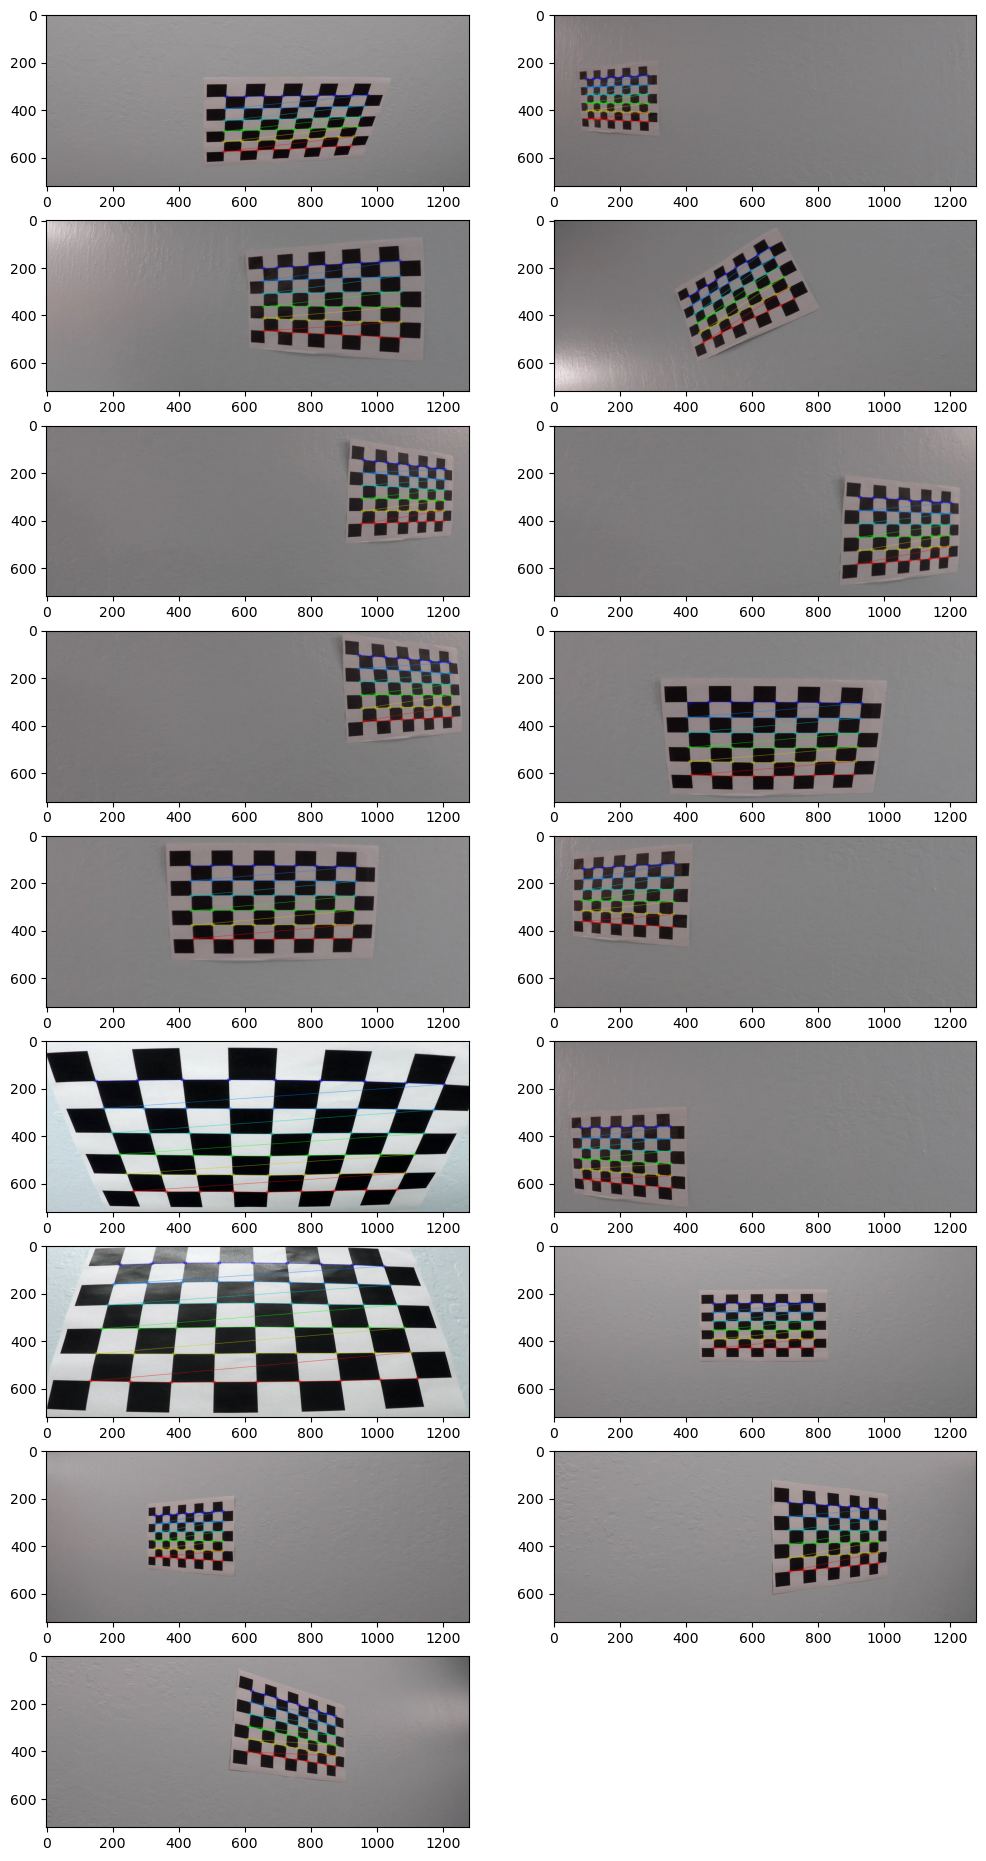

In [4]:
chessGrid = [9,6]
cal_images =  [];

imageResolution = [720,1280]

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((np.prod(chessGrid),3), np.float32)
objp[:,:2] = np.mgrid[0:chessGrid[0], 0:chessGrid[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (chessGrid[0],chessGrid[1]), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cal_images.append(img)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (chessGrid[0],chessGrid[1]), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

displayListImages(cal_images,cols=2)

In [5]:
## Find camera calibration parameters
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, tuple(imageResolution), None,None)

## Undistort images

### [function] Undistort images

In [6]:
def undistort_image(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

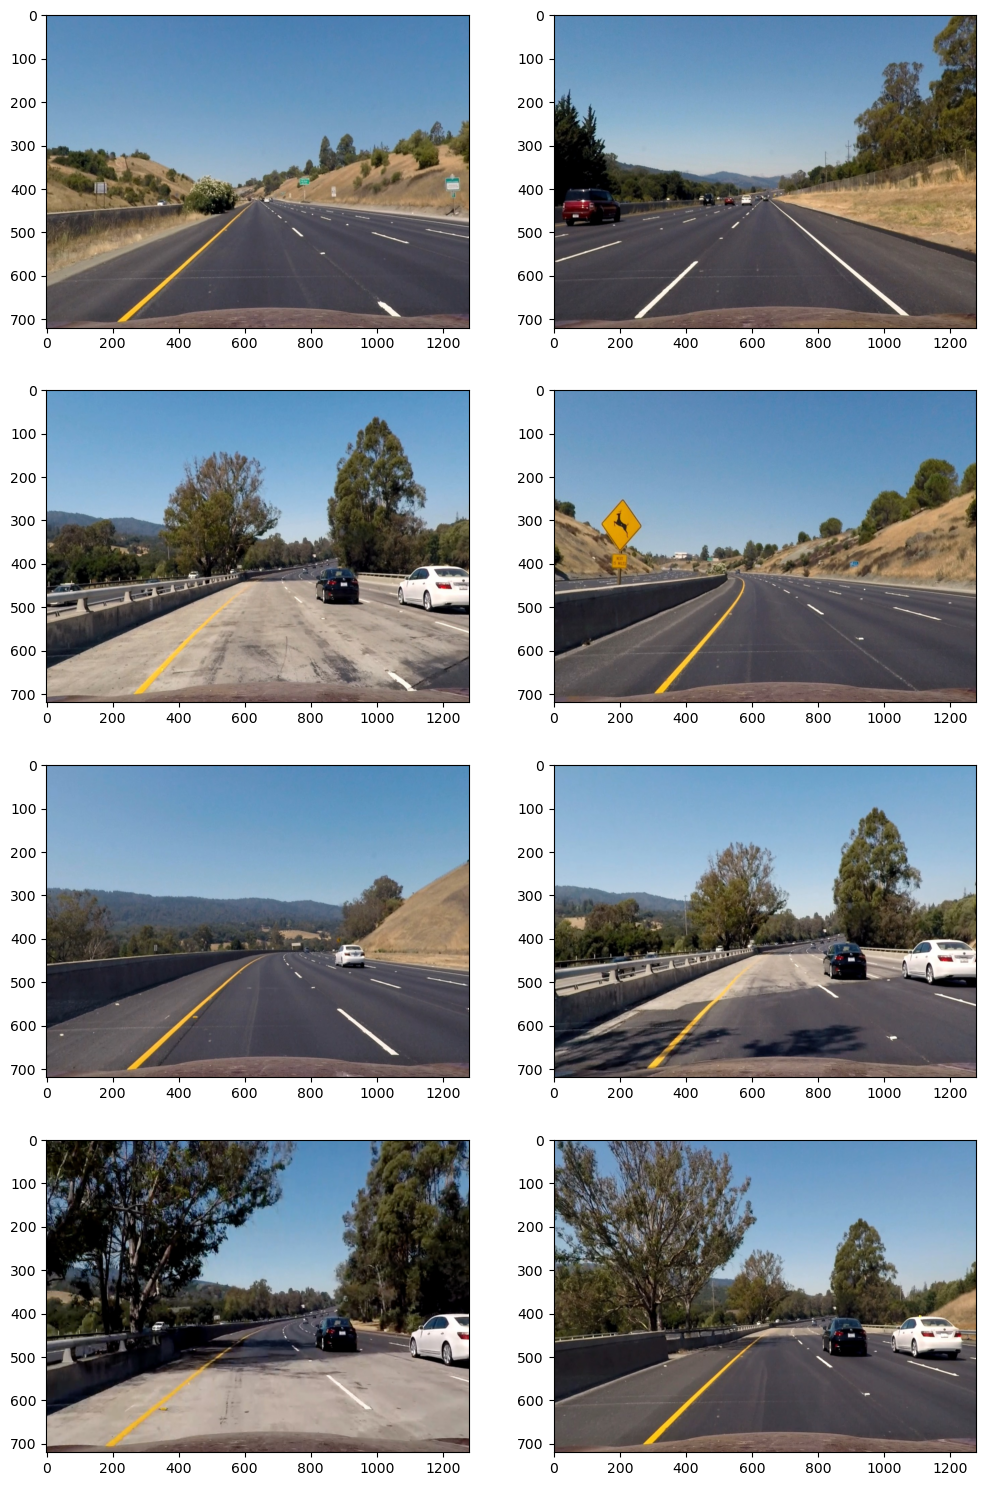

In [7]:
# Read test images
images = glob.glob('test_images/*.jpg')
test_images =  [];
und_images = []

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(rgbimg)
    
    undistorted = undistort_image(test_images[idx], mtx, dist)
    und_images.append(undistorted)
        
displayListImages(und_images,cols=2,cmap=None,)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

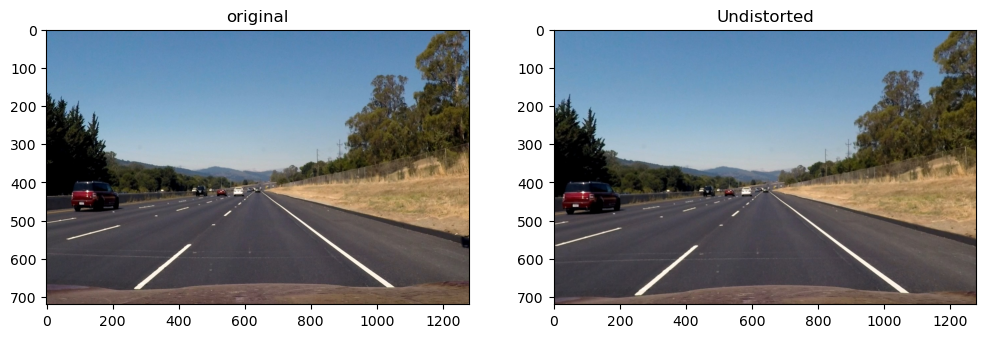

In [8]:
original = test_images[1]
undistorted_straight = undistort_image(original, mtx, dist)
displayListImages([original,undistorted_straight],cols=2,cmap='gray',figSize=[12,4],titles = ['original','Undistorted'])

# Color enhancement
### [function] Color enhancement

In [387]:
def colorEnhancement(img):
    """Converts the image to HSL
    Creates two masks to filter white and
    lleyow lines
    Applies the mask
    Be carefull to input an 8bit image!
    cv2.IMREAD_COLOR is your friend when using imgread
    """
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    ##find lleyows
    color1_hls = (70, 120, 0)
    color2_hls = (100, 255, 255)
    mask1 = cv2.inRange(hls, color1_hls,color2_hls)
    
    #find whites
    color1_hls_w = (0, 220, 0)
    color2_hls_w = (180, 255, 255)
    mask2 = cv2.inRange(hls, color1_hls_w,color2_hls_w)
    
    #    Add masks together
    mask = cv2.bitwise_or(mask1, mask2)
    
    res = cv2.bitwise_and(img,img, mask= mask)
    return res

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

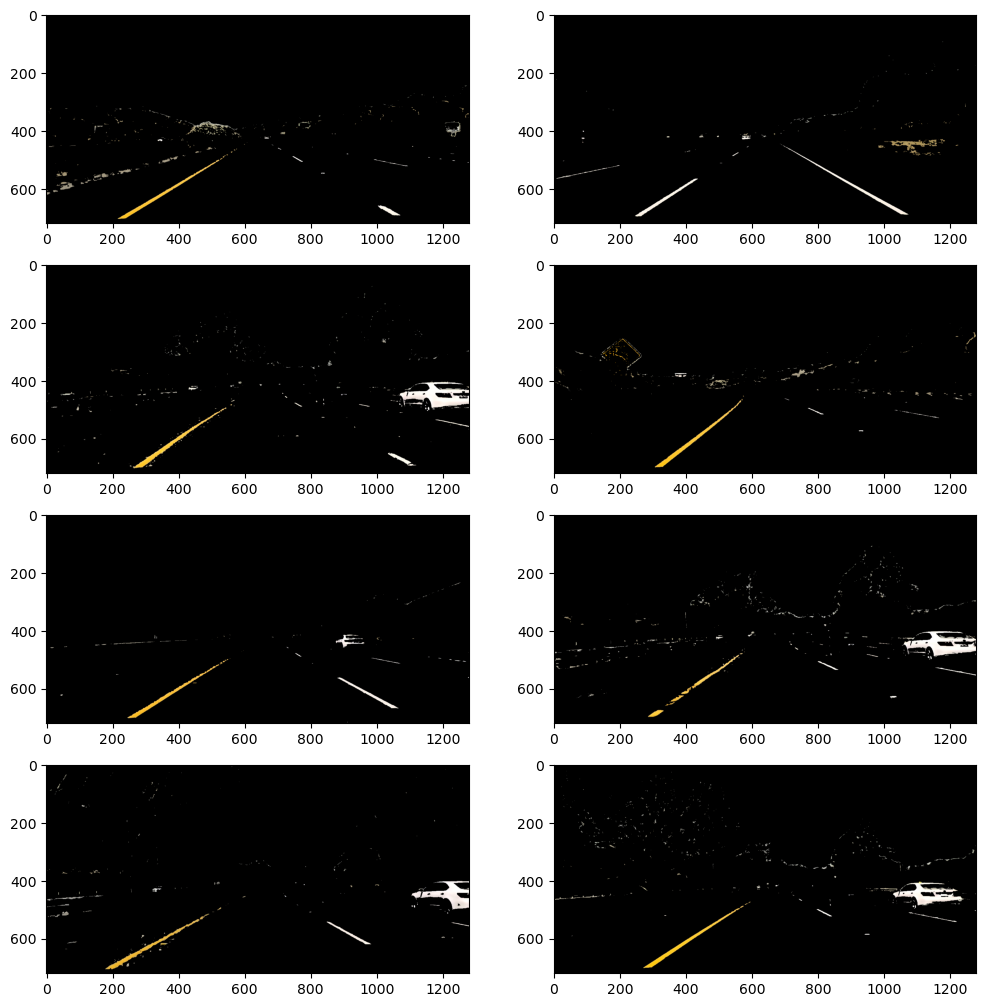

In [388]:
hls_images=[]


for img in und_images:
    imagehls = colorEnhancement(img)
    hls_images.append(imagehls)
        
displayListImages(hls_images,cols=2,cmap='gray',figSize=[12,8])

# Grayscale
### [function] Grayscale


In [389]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')
    Use cv2.COLOR_RGB2GRAY if you've read in an image using mpimg.imread(). 
    Use cv2.COLOR_BGR2GRAY if you've read in an image using cv2.imread().
    """
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

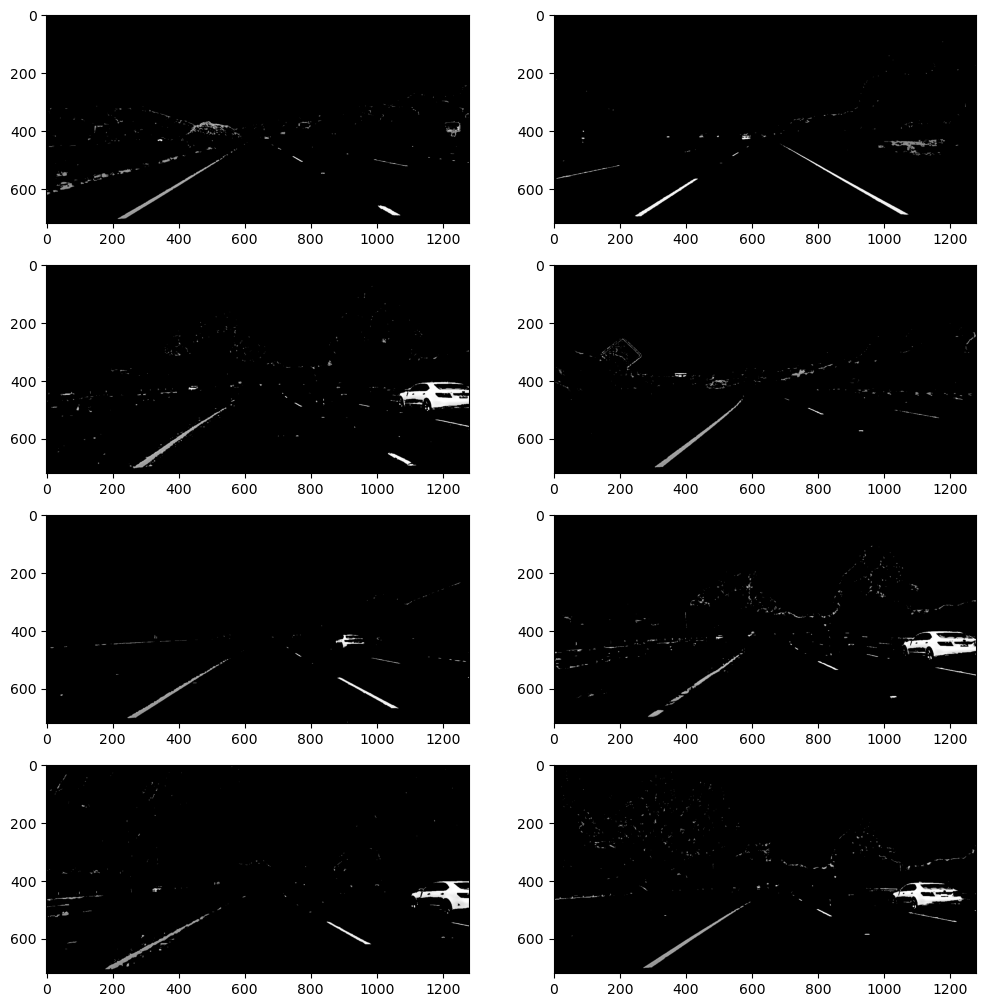

In [390]:
gray_images=[]

for img in hls_images:
    imageGray = grayscale(img)
    gray_images.append(imageGray)
        
displayListImages(gray_images,cols=2,cmap='gray',figSize=[12,8])

# Gaussian blur
### [function] gaussian_blur

In [391]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

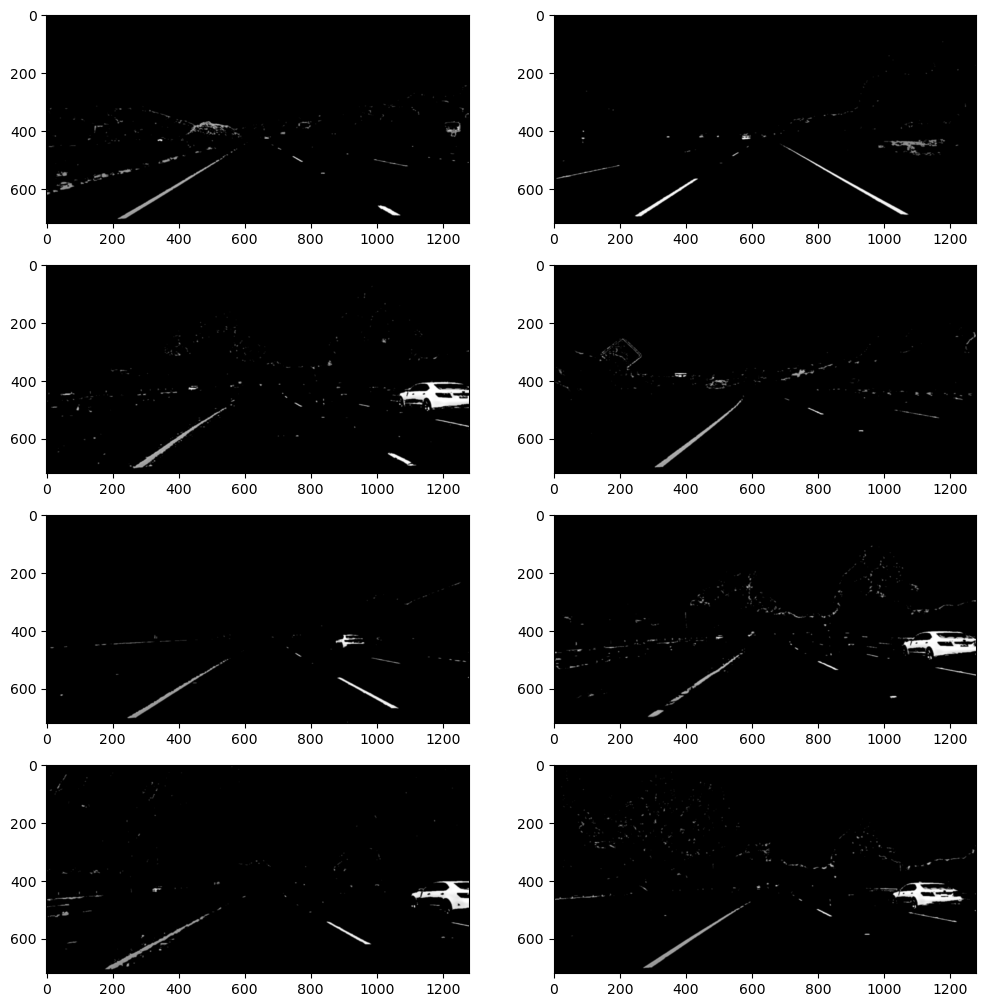

In [392]:
gauss_images=[]

gaussCoeff = 5

for img in gray_images:
    imageGauss = gaussian_blur(img,gaussCoeff)
    gauss_images.append(imageGauss)
        
displayListImages(gauss_images,cols=2,cmap='gray',figSize=[12,8])

# Edge detection
### [function] sobel_thresh

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

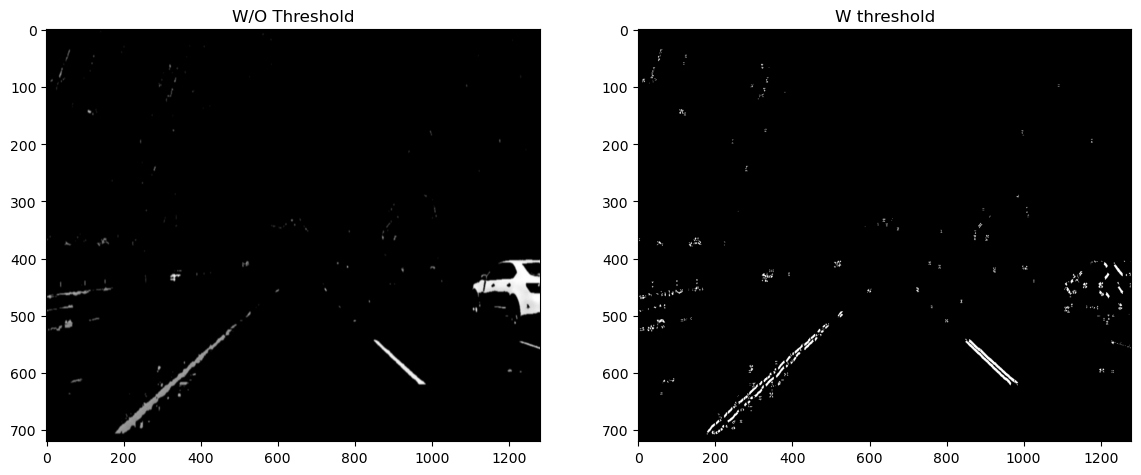

In [393]:
def sobel_thresh(img, sobel_kernel=3, x_thresh=[1,255], y_thresh=[1,255], mag_thresh=[1,255], dir_thresh=[-np.pi/2, np.pi/2]):

    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    scaled_sobelx = np.uint8(255*sobelx/np.max(sobelx))
    
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    scaled_sobely = np.uint8(255*sobely/np.max(sobely))
    
    # 3) Calculate the magnitude 
    square_sobelx = np.square(sobelx)
    square_sobely = np.square(sobely)
    abs_sobelxy = np.sqrt(np.add(square_sobelx,square_sobely))   
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobelxy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    
    # 5) Create a binary mask where mag thresholds are met
    mag_binary  = np.zeros_like(scaled_sobelxy)
    mag_binary [(scaled_sobelxy >= mag_thresh[0]) & (scaled_sobelxy <= mag_thresh[1])] = 1
    
    # 6) Diretion threshold [0 to π/2.] 0 is vertical an π/2 horizontal
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    
    #Converted to 8 bits 0 is vertical an π/2 horizontal
    scaled_sobelxydir = np.uint8(255*absgraddir/np.max(absgraddir))
    
    dir_binary  =  np.zeros_like(scaled_sobelxydir)
    dir_binary [(scaled_sobelxydir >= dir_thresh[0]) & (scaled_sobelxydir <= dir_thresh[1])] = 1
    
    # 7) Sobel x
    gradx = np.zeros_like(scaled_sobelx)
    gradx[(scaled_sobelx >= x_thresh[0]) & (scaled_sobelx <= x_thresh[1])] = 1
    
    # 8) Sobel y
    grady = np.zeros_like(scaled_sobely)
    grady[(scaled_sobely >= y_thresh[0]) & (scaled_sobely <= y_thresh[1])] = 1
    
    # Create a copy and apply the threshold    
    combined = np.zeros_like(scaled_sobelx)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

    # Return the result
    return combined

# Only x and y 
# sbinary = sobel_thresh(img, sobel_kernel=3, x_thresh=[10,100], y_thresh=[10,100], mag_thresh=[1,255], dir_thresh=[0,1.56])
img = gauss_images[6]

sbinary = sobel_thresh(img, sobel_kernel=5, x_thresh=[80,100], y_thresh=[40,100], mag_thresh=[50,255], dir_thresh=[100,200])
displayListImages([img,sbinary],cols=2,cmap='gray',figSize=[14,6],titles= ["W/O Threshold", "W threshold"])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

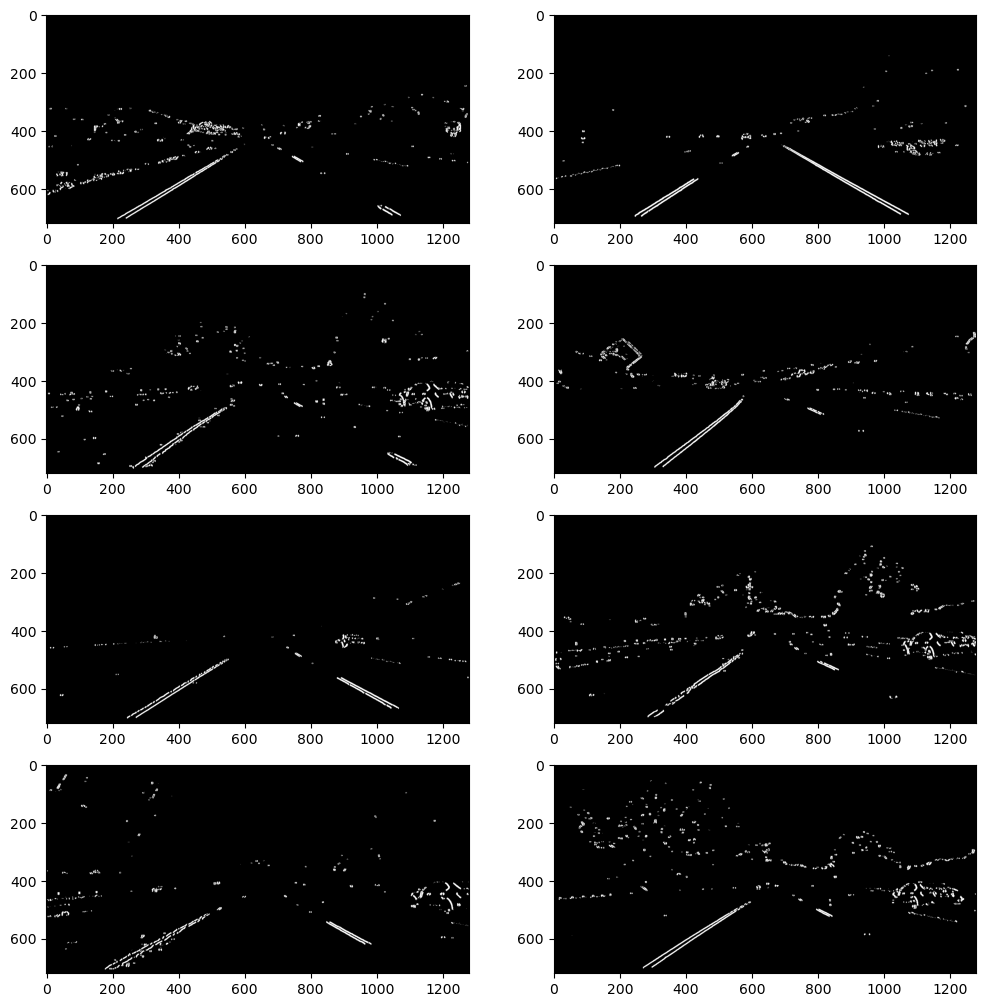

In [394]:
edge_images = []

for img in gauss_images:
    #sbinary = sobel_thresh(img, sobel_kernel=5, x_thresh=[80,100], y_thresh=[40,100], mag_thresh=[1,255], dir_thresh=[0,1.56])
    sbinary = sobel_thresh(img, sobel_kernel=5, x_thresh=[80,100], y_thresh=[80,100], mag_thresh=[50,255], dir_thresh=[0,200])
    edge_images.append(sbinary)
        
displayListImages(edge_images,cols=2,cmap='gray',figSize=[12,8])

# Region of interest
### [function] region_of_interest

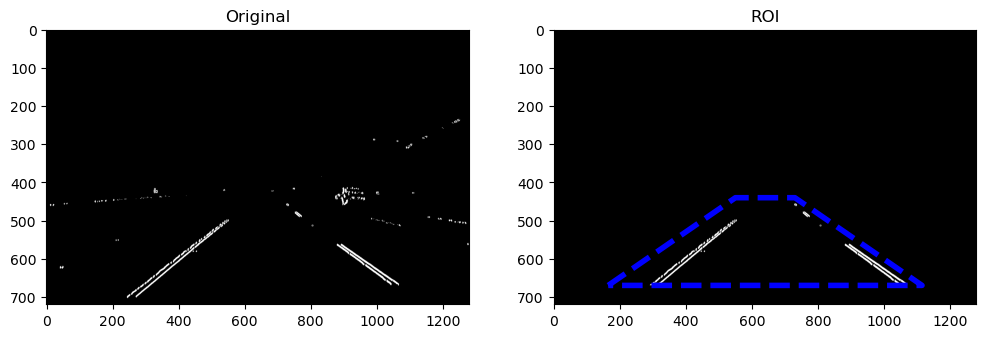

In [395]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

#Test function
edge_image = edge_images[4]

imagesROI=[]
titlesROI=[]

ysize =edge_image.shape[0]
xsize =edge_image.shape[1]

ROI_upperWidth = 180 #Width of the upper horizontal straight in px
ROI_upperHeight = 280 #Height of the upper horizontal straight from the bottom of the image in px
ROI_lowerWidth = 950 #Width of the lower horizontal straight in px
ROI_lowerHeight = 50  #Height of the lower horizontal straight  from the bottom of the image in px      
    
limitLL = ((xsize/2)-(ROI_lowerWidth/2),ysize-ROI_lowerHeight);
limitLR = (xsize - ((xsize/2)-(ROI_lowerWidth/2)),ysize-ROI_lowerHeight);
limitUL = ((xsize/2)-(ROI_upperWidth/2), ysize-ROI_upperHeight);
limitUR = ((xsize/2)+(ROI_upperWidth/2), ysize-ROI_upperHeight);
vertices = np.array([[limitLL,limitUL,limitUR , limitLR]], dtype=np.int32)

imageROI = region_of_interest(edge_image,vertices)

imagesROI.append(edge_image);titlesROI.append("Original");
imagesROI.append(imageROI);titlesROI.append("ROI");
    
displayListImages(imagesROI,cols=2,titles=titlesROI, figSize=[12,4], cmap='gray')

# Plot vertices for verification in original image
x = [limitLL[0], limitUL[0], limitUR[0], limitLR[0],limitLL[0]]
y = [limitLL[1], limitUL[1], limitUR[1], limitLR[1],limitLL[1]]
plt.plot(x, y, 'b--', lw=4)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

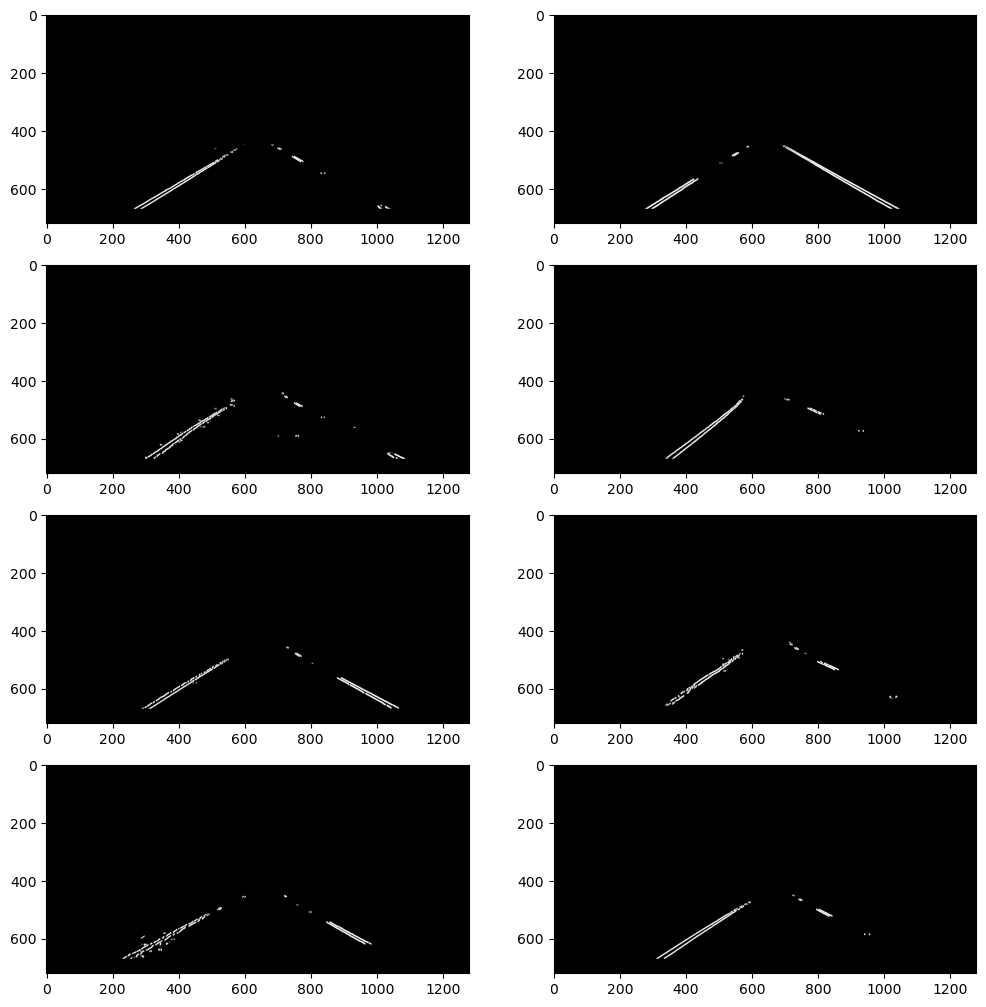

In [396]:
roi_images = []

for img in edge_images:
    imageROI = region_of_interest(img,vertices)
    roi_images.append(imageROI)
        
displayListImages(roi_images,cols=2,cmap='gray',figSize=[12,8])

# Hough lines

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

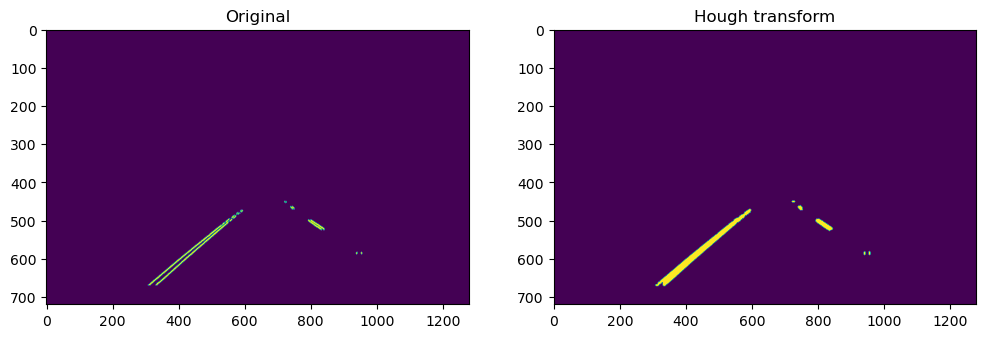

In [397]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """ 
    for line in lines:
        #print(line)
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be a np.array image
    Returns an image with hough lines drawn and the hough lines points.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    
    try:
        draw_lines(line_img, lines, color=[255, 0, 0], thickness=4)
    except:
        lines = []
        print("No line found")
        pass
    return line_img,lines
#Test function
imagesHough=[]
titlesHough=[]

# Hough parameters
rho = 1 # distance resolution in pixels of the Hough grid
theta = 1*np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1    # minimum number of votes (intersections in Hough grid cell)
min_line_len = 5 #minimum number of pixels making up a line
max_line_gap = 40   # maximum gap in pixels between connectable line segments

imgHouhg,lines = hough_lines(imageROI, rho, theta, threshold, min_line_len, max_line_gap,)

imagesHough.append(imageROI);titlesHough.append("Original");
imagesHough.append(imgHouhg);titlesHough.append("Hough transform");
    

displayListImages(imagesHough,cols=2,titles=titlesHough, figSize=[12,4])
#print(lines)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

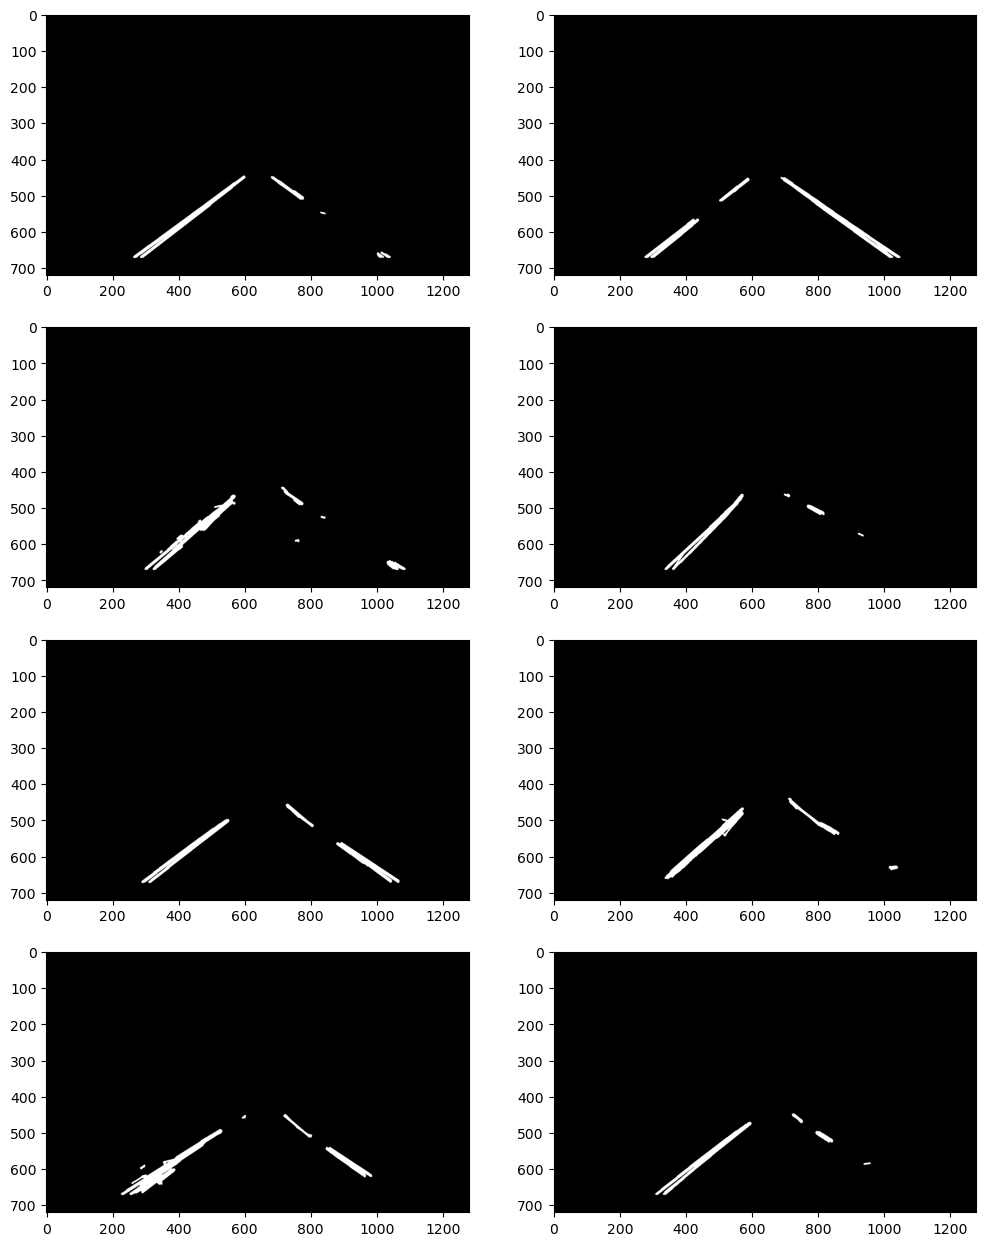

In [398]:
hough_images = []


# Hough parameters
rho = 1 # distance resolution in pixels of the Hough grid
theta = 1*np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10    # minimum number of votes (intersections in Hough grid cell)
min_line_len = 5 #minimum number of pixels making up a line
max_line_gap = 40   # maximum gap in pixels between connectable line segments

for img in roi_images:
    imgHouhg,lines = hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap,)
    hough_images.append(imgHouhg)
        
displayListImages(hough_images,cols=2,cmap='gray',figSize=[12,10])

## Perspective Transform

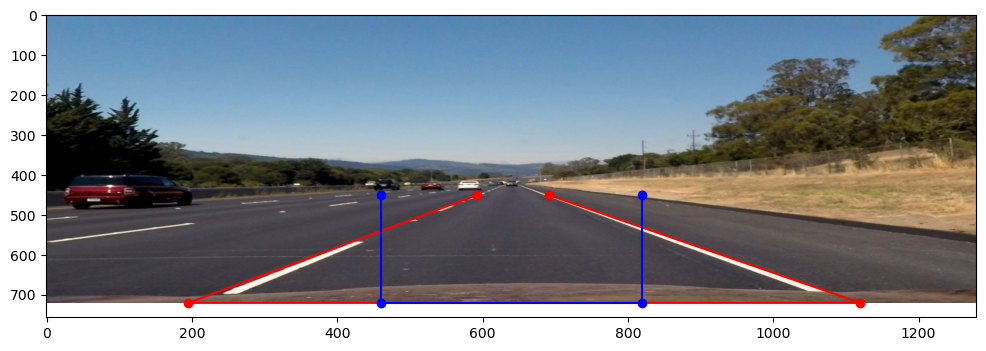

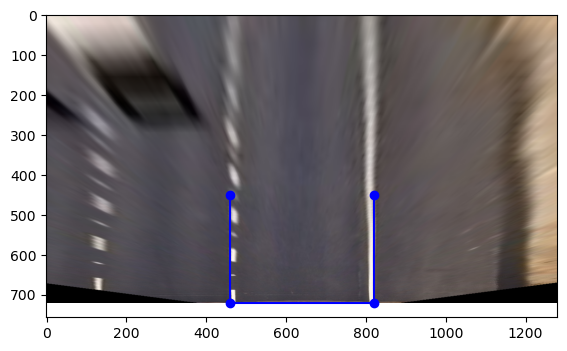

In [399]:
img = und_images[1]
displayListImages([img],cols=1,cmap='gray',figSize=[12,4])

#Source
# Place source points for uimage wrapping
dotS_UL=[592,450]; dotS_UR= [691,450]
dotS_LL=[195,720] ; dotS_LR= [1120,720]

src= np.float32([dotS_UL,dotS_LL,dotS_LR,dotS_UR])

# Create and plot source plane
xs = [x[0] for x in src]
ys = [x[1] for x in src]

plt.plot(xs,ys, 'ro-')

#Destination
hwidth = 180
offset = -0
dotD_UL=[offset+(1280//2)-hwidth,450]; dotD_UR= [offset+(1280//2)+hwidth,450]
dotD_LL=[offset+(1280//2)-hwidth,720] ; dotD_LR= [offset+(1280//2)+hwidth,720]

dst= np.float32([dotD_UL,dotD_LL,dotD_LR,dotD_UR])

xd = [x[0] for x in dst]
yd = [x[1] for x in dst]

plt.plot(xd,yd, 'bo-')

# Create and plot source plane
xd = [x[0] for x in dst]
yd = [x[1] for x in dst]

#Computye perspective transform
M = cv2.getPerspectiveTransform(src, dst)

warped = cv2.warpPerspective(img, M, (1280,720), flags=cv2.INTER_LINEAR)

plt.figure()
plt.imshow(warped)
plt.plot(xd,yd, 'bo-')

### [function] Warp images

In [400]:
def warp_image(img,conversion = 'warp' ,hwidth = 250 ,offset = -0, height = -450, overplotLines= True ):
    
    #Source
    # Place source points for uimage wrapping
    dotS_UL=[592,450]; dotS_UR= [692,450]
    dotS_LL=[195,720] ; dotS_LR= [1120,720]

    src= np.float32([dotS_UL,dotS_LL,dotS_LR,dotS_UR])

    # Create and plot source plane
    xs = [x[0] for x in src]
    ys = [x[1] for x in src]

    if overplotLines:
        plt.plot(xs,ys, 'ro-')

    #Destination
    dotD_UL=[offset+(1280//2)-hwidth,height]; dotD_UR= [offset+(1280//2)+hwidth,height]
    dotD_LL=[offset+(1280//2)-hwidth,720] ; dotD_LR= [offset+(1280//2)+hwidth,720]

    dst= np.float32([dotD_UL,dotD_LL,dotD_LR,dotD_UR])

    xd = [x[0] for x in dst]
    yd = [x[1] for x in dst]

    if overplotLines:
        plt.plot(xd,yd, 'bo-')

    # Create and plot source plane
    xd = [x[0] for x in dst]
    yd = [x[1] for x in dst]
    
    #Computye perspective transform
    if conversion == 'unwarp':
        M = cv2.getPerspectiveTransform(dst,src)
    else:
        M = cv2.getPerspectiveTransform(src, dst)
        
    warped = cv2.warpPerspective(img, M, (1280,720), flags=cv2.INTER_LINEAR)
    return warped

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

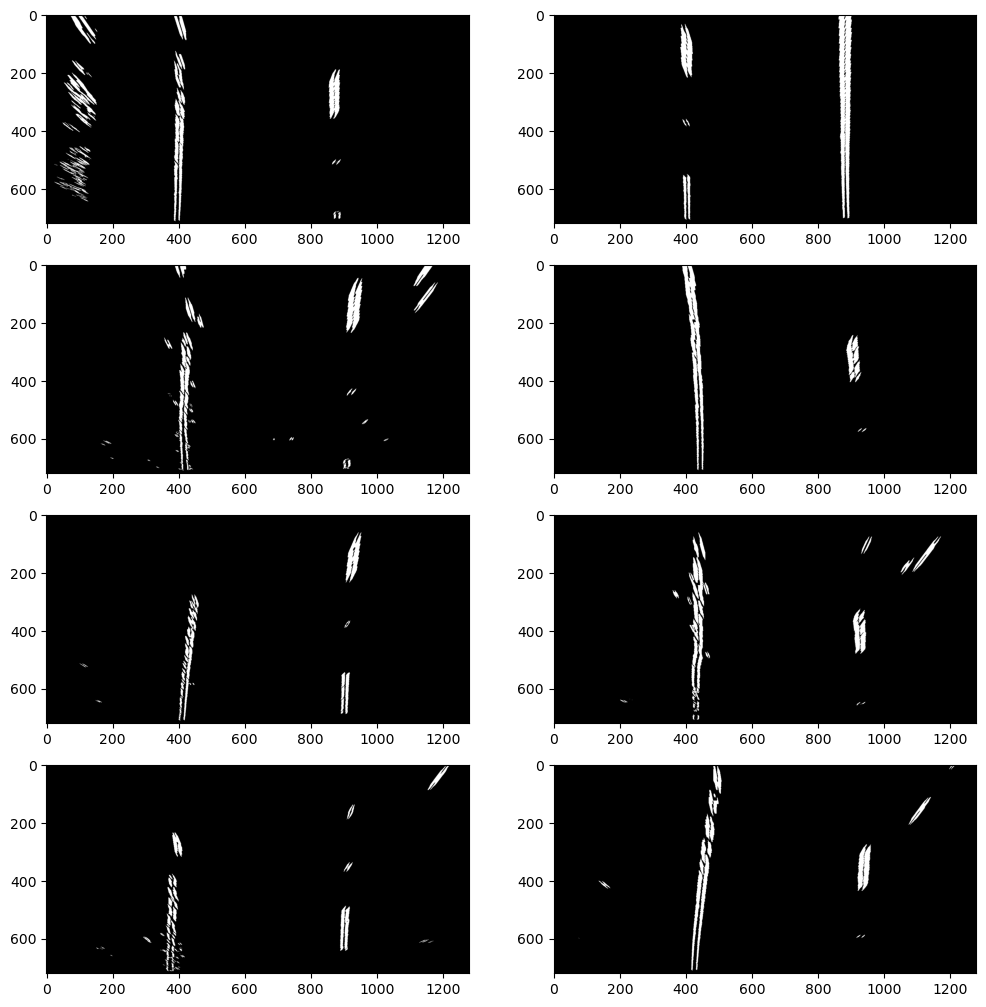

In [407]:
warped_images = []

for img in edge_images:
    warped_img = warp_image(img, hwidth = 250 ,offset = 0, height = -600 )
    warped_images.append(warped_img)
        
displayListImages(warped_images,cols=2,cmap='gray',figSize=[12,8])

# Finding lines
### [function] hist

In [408]:
def hist(img):
    # Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]

    # Sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram


<ipython-input-3-28387f0ea792>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, i+1)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

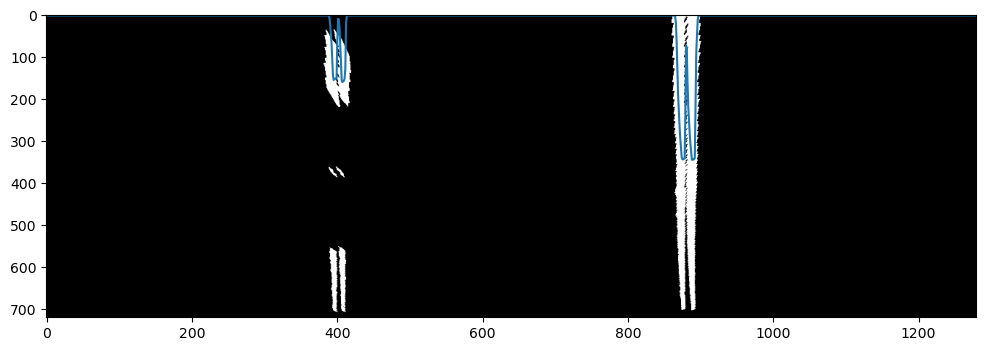

In [436]:
warped_image = warped_images[1]
histogram = hist(warped_image)       

displayListImages([warped_image],cols=1,cmap='gray',figSize=[12,4], overplot =plt.plot(histogram))

### [Class] Line

In [439]:
class Line():
# Class to receive the characteristics of each line detection
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # missdetections (resets every good detection)
        self.missdetections = 0  
        
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the curernt iteration
        self.currentx =  0  
        #average x values of the fitted line over the last n iterations
        self.bestx =     0  
        
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = [np.array([False])]    
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 

        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None  
               
    def updateLine(self,detected,current_fit,allx,ally, currentx):
        if detected:
            self.detected = True
            self.missdetections = 0  
            self.diffs = np.subtract(current_fit,self.current_fit)
            self.allx = allx
            self.ally = ally
            self.current_fit = current_fit
            #TODO
            self.best_fit = current_fit
            
            self.currentx = currentx
            self.measure_real_curvature()
        else: 
            self.detected = False
            self.missdetections += 1  
            
            
    def measure_real_curvature(self):
        '''
        Calculates the curvature of polynomial functions in meters.
        '''
        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 30/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/450 # meters per pixel in x dimension

        # Define y-value where we want radius of curvature
        # We'll choose the maximum y-value, corresponding to the bottom of the image
        ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
        y_eval = np.max(ploty)

        ##### Implement the calculation of R_curve (radius of curvature) #####
        self.radius_of_curvature = ((1 + (2*self.best_fit[0]*y_eval*ym_per_pix + self.best_fit[1])**2)**1.5) / np.absolute(2*self.best_fit[0])

### [function] find_lane_pixels

In [440]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 10
    # Set the width of the windows +/- margin
    margin = 60
    # Set minimum number of pixels found to recenter window
    minpix = 40

    # Set height of windows - based on nwindows above and image shape
    window_height = int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        
        #The four below boundaries of the window 
        win_xleft_low =  leftx_current - margin//2
        win_xleft_high = leftx_current  + margin//2
        
        win_xright_low = rightx_current  - margin//2
        win_xright_high = rightx_current  + margin//2
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ###Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        #If you found > minpix pixels, recenter next window
        if len(good_left_inds) > minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
            
        if len(good_right_inds) > minpix:        
            rightx_current = int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx_base,rightx_base, leftx, lefty, rightx, righty, out_img

### [function] fit_polynomial

In [441]:
def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx_base, rightx_base, leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        lineDetected = True
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
        lineDetected = False
        
    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return leftx_base, rightx_base, left_fit,right_fit,lineDetected, leftx, lefty, rightx, righty, out_img 

In [442]:
def similarCurvature(lineLeft,lineRight):
    return True

In [443]:
def rightSeparation(lineLeft,lineRight):
    return True

In [444]:
def areParallel(lineLeft,lineRight):
    return True

<ipython-input-3-28387f0ea792>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows, cols, i+1)


{'allx': array([432, 433, 434, ..., 427, 428, 429], dtype=int64),
 'ally': array([648, 648, 648, ...,  71,  71,  71], dtype=int64),
 'best_fit': array([-9.07190327e-05,  1.17412290e-01,  4.03324369e+02]),
 'bestx': 0,
 'current_fit': array([-9.07190327e-05,  1.17412290e-01,  4.03324369e+02]),
 'currentx': 447,
 'detected': True,
 'diffs': array([[-9.07190327e-05,  1.17412290e-01,  4.03324369e+02]]),
 'line_base_pos': None,
 'missdetections': 0,
 'radius_of_curvature': 5615.508562872125,
 'recent_xfitted': []}
{'allx': array([920, 921, 919, ..., 919, 920, 921], dtype=int64),
 'ally': array([576, 576, 577, ..., 287, 287, 287], dtype=int64),
 'best_fit': array([ 1.93274053e-04, -9.19506393e-02,  9.14610958e+02]),
 'bestx': 0,
 'current_fit': array([ 1.93274053e-04, -9.19506393e-02,  9.14610958e+02]),
 'currentx': 897,
 'detected': True,
 'diffs': array([[ 1.93274053e-04, -9.19506393e-02,  9.14610958e+02]]),
 'line_base_pos': None,
 'missdetections': 0,
 'radius_of_curvature': 2612.1062030

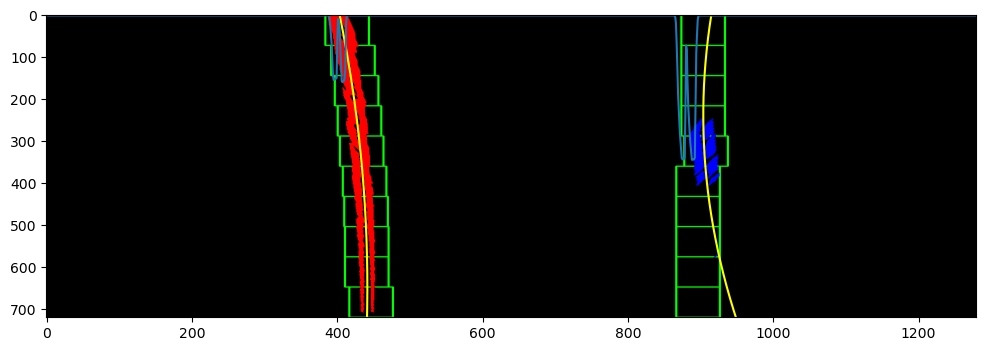

In [450]:
currentIndex= 3
warped_image = warped_images[currentIndex]


lineLeft = Line()
lineRight = Line()

leftx_base, right_base, left_fit, right_fit, lineDetected, leftx, lefty, rightx, righty, out_img  = fit_polynomial(warped_image)

lineLeft.updateLine(detected=lineDetected, current_fit=left_fit, allx=leftx, ally=lefty, currentx=leftx_base )
lineRight.updateLine(detected=lineDetected, current_fit=right_fit, allx=rightx, ally=righty, currentx=right_base )


displayListImages([out_img],cols=1,cmap='gray',figSize=[12,4], overplot =plt.plot(histogram))

pprint(vars(lineLeft))
pprint(vars(lineRight))

### [function] fit_polynomial

# Unwarp images

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

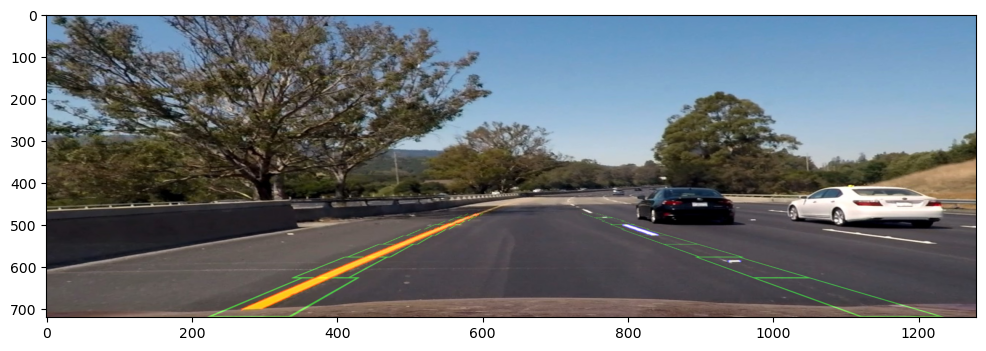

In [435]:
unwarped_img = warp_image(out_img, conversion= 'unwarp', hwidth = 250 ,offset = 0, height = -600, overplotLines = False )

image_out = cv2.addWeighted(unwarped_img, 0.5,und_images[currentIndex] , 1, 0.0)

displayListImages([image_out],cols=1,cmap='gray',figSize=[12,4])